In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Задание

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков  

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [3]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

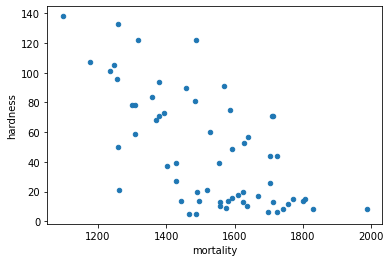

In [4]:
df.plot(kind='scatter', x='mortality', y='hardness')

Из графика можно предположить, что есть некоторая обратная взаимосвязь

In [98]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Наблюдается средняя обратная зависимость показателей

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=68)
print(X_train.shape)
print(y_train.shape)

(45, 1)
(45,)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[-3.13245548]
1667.6979438294163


In [34]:
y_pred = model.predict(X_test)
y_pred

array([1623.84356712, 1586.25410137, 1413.96905001, 1545.53218014,
       1445.2936048 , 1482.88307055, 1332.52520754, 1620.71111164,
       1652.03566643, 1652.03566643, 1423.36641644, 1642.63829999,
       1285.53837535, 1251.08136508, 1423.36641644, 1445.2936048 ])

In [35]:
model.score(X_test, y_test)

0.40740761541154

Коэффициент детерминации полученной модели говорит о том, что на основании имеющихся данных прогноз смертности населения на основании показателей концентрации кальция в питьевой воде не является точным

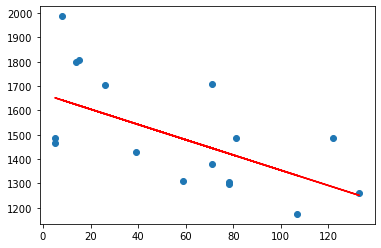

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [37]:
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
3,14,1623.843567,1800
30,26,1586.254101,1704
59,81,1413.969050,1485
17,39,1545.532180,1428
60,71,1445.293605,1378
33,59,1482.883071,1309
37,107,1332.525208,1175
6,15,1620.711112,1807
38,5,1652.035666,1486
2,5,1652.035666,1466


### Посчитаем отдельно для южных и северных городов

Южные города

In [81]:
df_south = df[df.location == 'South']
df_north = df[df.location == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

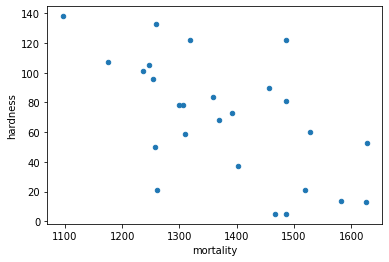

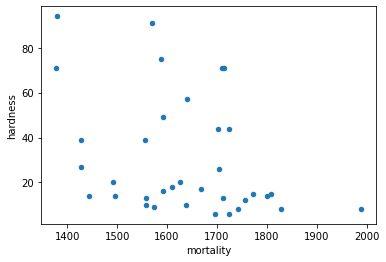

In [82]:
df_south.plot(kind='scatter', x='mortality', y='hardness')
df_north.plot(kind='scatter', x='mortality', y='hardness')

При разбиении данных по регионам закономерности на графике становятся менее заметными

In [83]:
df_south[['mortality', 'hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [84]:
df_south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [85]:
X = df_south[['hardness']]
y = df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
print(X_train.shape)
print(y_train.shape)

(19, 1)
(19,)


In [86]:
model= LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[-2.11602572]
1516.724904578534


In [87]:
model.score(X_test, y_test)

0.07757119595978268

Северные города

In [89]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [90]:
df_north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [95]:
X = df_north[['hardness']]
y = df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
print(X_train.shape)
print(y_train.shape)

(26, 1)
(26,)


In [96]:
model= LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[-1.80540444]
1676.192071051168


In [97]:
model.score(X_test, y_test)

0.04043293033998774

Если разбить данные на два южные и северные города, взяимосвязь данных исчезает и можно сделать вывод, что уровень сметности не зависит от концентрации кальция в питьевой воде, либо данных недостаточно для корректных рассчетов